# World Happiness Report Analysis

This notebook presents a structured analysis of the World Happiness Report dataset using tools from the *Computational Methods and Data Analysis* course. We begin with Exploratory Data Analysis (EDA), followed by correlation analysis, hypothesis testing, factor analysis, and a regression model to explain happiness scores.

## 1. Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

happiness = pd.read_csv('2018.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


## 2. Exploratory Data Analysis (EDA)
We examine distributions, detect missing values, and inspect relationships between variables.

In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [5]:
happiness.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

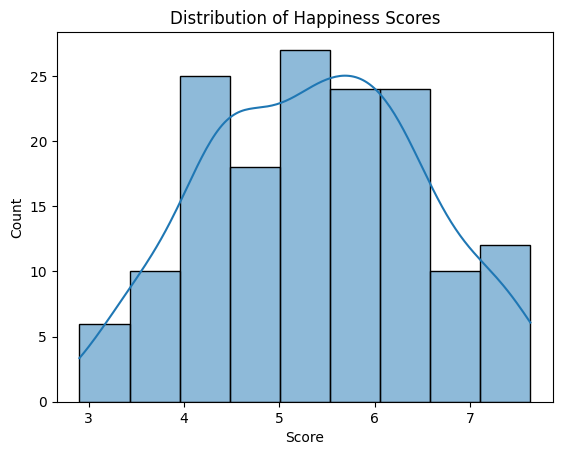

In [6]:
sns.histplot(happiness['Score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.show()

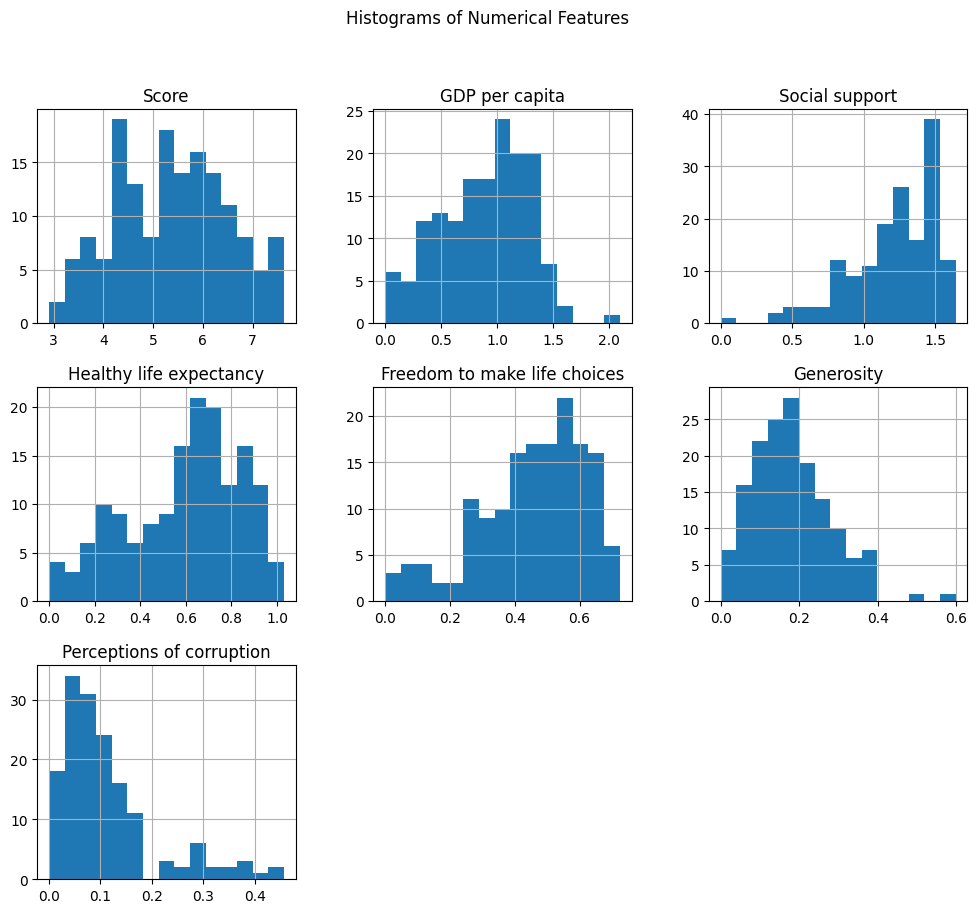

In [7]:
happiness.drop(columns=['Overall rank', 'Country or region']).hist(bins=15, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

From the histograms, we observe skewed distributions in some variables (e.g., GDP per capita, generosity), while happiness scores are more symmetric.

## 3. Correlation Analysis
We compute the correlation matrix and visualize it to identify relationships between variables.

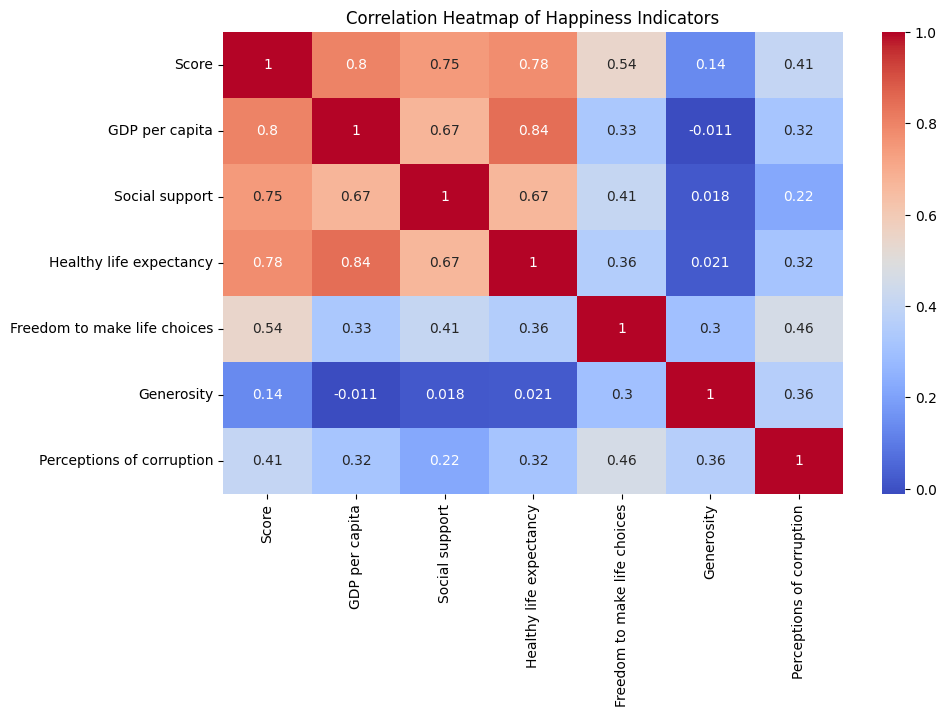

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(happiness.drop(columns=['Overall rank', 'Country or region']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Happiness Indicators')
plt.show()

Notable correlations:
- `GDP per capita` and `Healthy life expectancy` are highly correlated (0.79)
- `Social support` and `Score` also show strong correlation (0.74)
- `Perceptions of corruption` is weakly correlated with happiness
This suggests that economic and health-related indicators are key drivers of happiness.

## 4. Hypothesis Testing
We test if happiness scores differ significantly between high-GDP and low-GDP countries.

In [9]:
median_gdp = happiness['GDP per capita'].median()
high_gdp = happiness[happiness['GDP per capita'] > median_gdp]['Score']
low_gdp = happiness[happiness['GDP per capita'] <= median_gdp]['Score']
ttest_result = stats.ttest_ind(high_gdp, low_gdp, equal_var=False)
ttest_result

TtestResult(statistic=np.float64(11.67215758822544), pvalue=np.float64(6.027279635180945e-23), df=np.float64(153.8723723660498))

If the p-value is less than 0.05, we reject the null hypothesis and conclude that happiness scores differ significantly between high-GDP and low-GDP countries.

## 5. Factor Analysis
We reduce dimensionality and uncover latent factors behind happiness indicators.

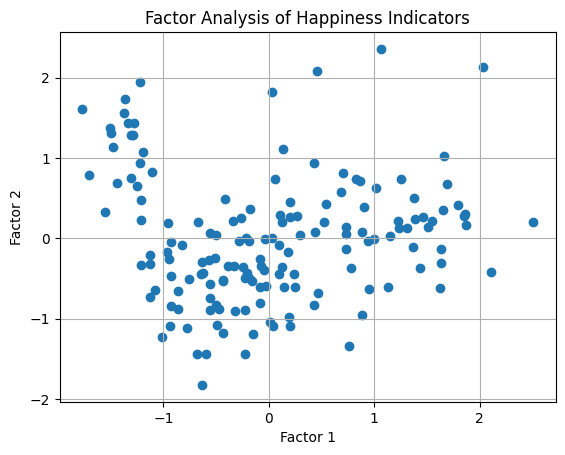

In [10]:

features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = happiness[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

plt.scatter(X_fa[:, 0], X_fa[:, 1])
plt.title('Factor Analysis of Happiness Indicators')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.grid(True)
plt.show()


The scatterplot helps visualize latent structures. For example, one factor might represent economic strength, and the other social trust.

## 6. Multiple Linear Regression
We model `Score` using all six indicators to quantify their influence.

In [11]:
X_reg = sm.add_constant(X)
y_reg = happiness.loc[X.index, 'Score']
model = sm.OLS(y_reg, X_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     93.08
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.05e-47
Time:                        11:42:18   Log-Likelihood:                -115.51
No. Observations:                 155   AIC:                             245.0
Df Residuals:                     148   BIC:                             266.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8235      0.198      9.223      0.000       1.433       2.214
GDP per capita                   0.9017      0.242      3.721      0.000       0.423       1.381
Social support                   1.1150      0.212      5.267      0.000       0.697       1.533
Healthy life expectancy          0.9671      0.343      2.824      0.005       0.290       1.644
Freedom to make life choices     1.3984      0.319      4.390      0.000       0.769       2.028
Generosity                       0.5236      0.472      1.110      0.269      -0.409       1.456
Perceptions of corruption        0.7278      0.528      1.379      0.170      -0.315       1.771
==============================================================================
Omnibus:                        7.426   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.118
Skew:                          -0.471   Prob(JB):                       0.0285
Kurtosis:                       3.465   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression summary shows which predictors significantly influence happiness (via p-values) and how strong the relationship is (via coefficients). A high R-squared indicates a good fit.

## 7. Conclusion
- Economic and social indicators (GDP per capita, social support) are strong predictors of happiness.
- Countries with higher GDP tend to have significantly higher happiness scores.
- Factor analysis reveals underlying structures that group correlated indicators.
- The regression model provides a quantified understanding of what drives happiness.

## 8. Regression Tree
We use a decision tree regressor to model the `Score` variable. This method captures non-linear interactions and provides interpretable rules.

In [12]:

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train-test split
X = happiness[['GDP per capita', 'Social support', 'Healthy life expectancy',
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].dropna()
y = happiness.loc[X.index, 'Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit regression tree
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.3f}')


Mean Squared Error on Test Set: 0.355


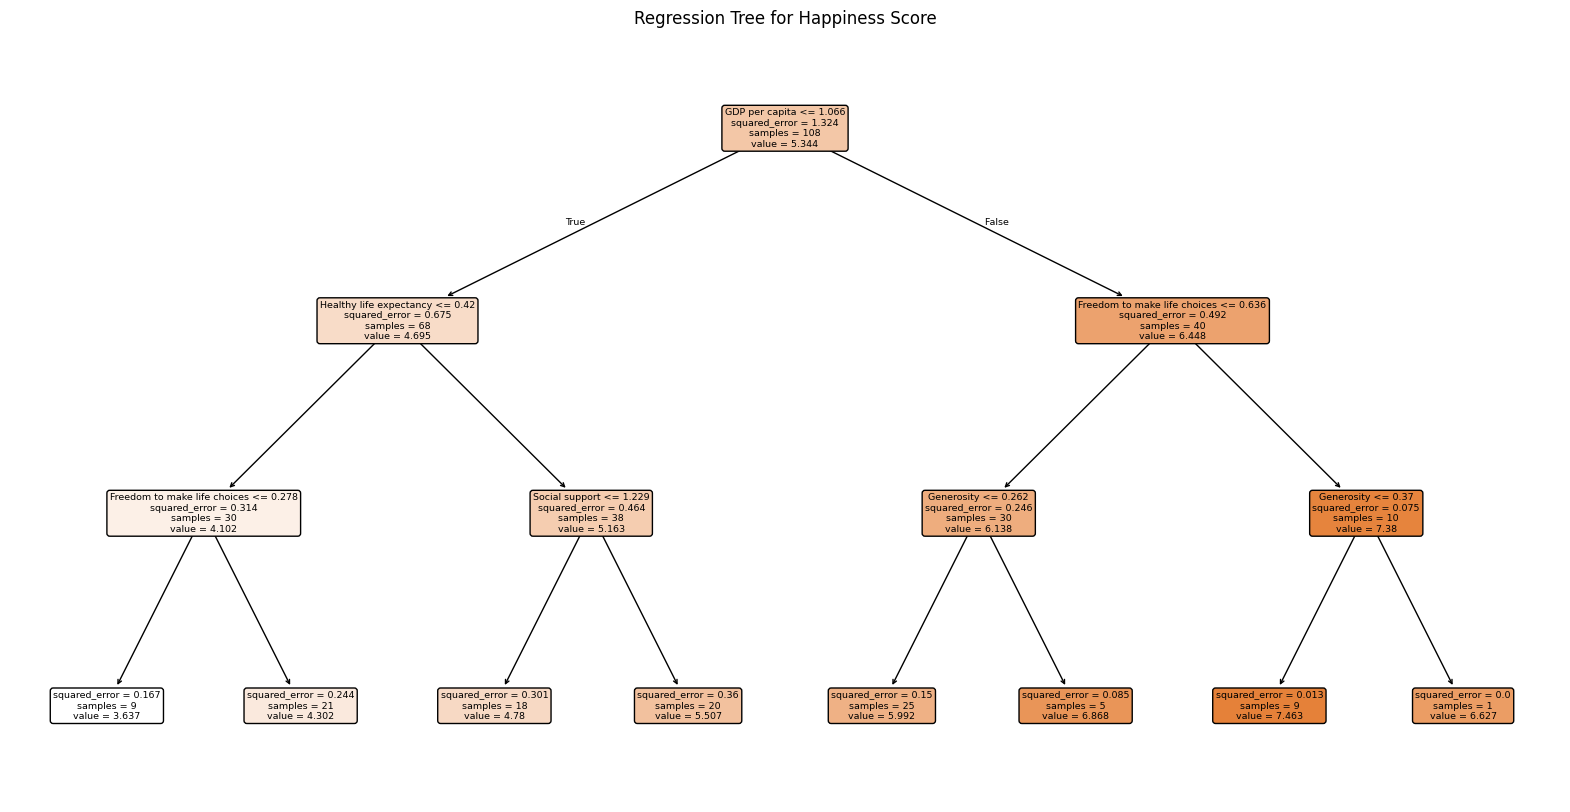

In [13]:

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Regression Tree for Happiness Score')
plt.show()


The regression tree helps us interpret non-linear interactions. For example, we can identify threshold values in `GDP` or `Social support` that lead to different levels of happiness.